# Fashion MNIST data classification
    it is a dataset of 60,000 small square 28x28 pixel grayscale images of items of 10 types of clothing such as shoes, t-shirts, dresses and more. The mapping of all 0-9 integers to class labels is listed below:
    0:T-shirt/top, 1:Trouser, 2:pillover, 3:Dress, 4:Coat, 5:Sandal, 6:Shirt, 7:Sneaker, 8:Bag, 9:Ankle boot

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt 
from keras.utils import to_categorical 
print("lib imported succesfully")

lib imported succesfully


In [9]:
# now how to get MNIST handwritten digital data
# load data

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


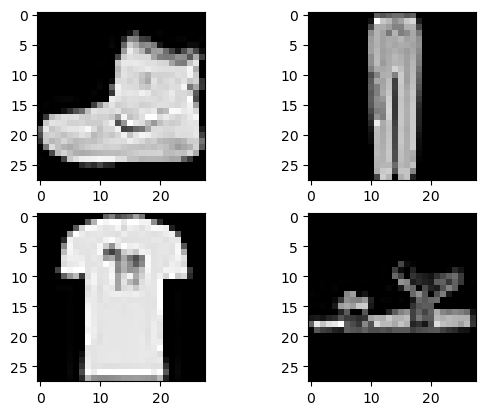

In [11]:
# plot 4 images as gray scale

plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1000], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[33333], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[59999], cmap = plt.get_cmap('gray'))


In [12]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

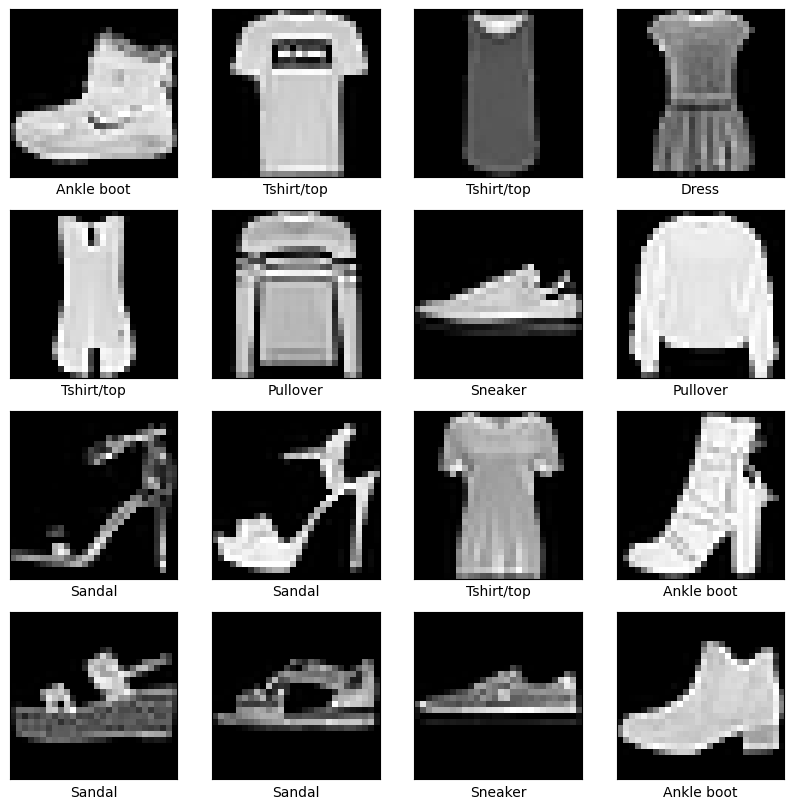

In [13]:
plt.figure(figsize = (10,10))
for i in range(16):
    # define subplot
    plt.subplot(4,4,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
    plt.xlabel(class_names[y_train[i]])  # y_train(i) will give class no and using
   
# show figure
plt.show()

In [14]:
print(y_train[0], y_train[1000], y_train[33333], y_train[59999])

9 1 0 5


In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [16]:
# we can feed whole image to the CNN, scale to the range 0-1

xm_train = x_train / 255
xm_test = x_test / 255

In [17]:
# output variables need to be converted to categorical data 
ym_train = to_categorical(y_train) # converting to categories
ym_test = to_categorical(y_test)

# Build CNN arcitecture

In [18]:
# Hyperparameters
NF = 16  # how many filter 
f_size = (3,3)  # filter size
p_size = (2,2)
i_size = (28,28,1)  # no of inputs 60000 images each image eof size 28*28, 784 pixel
NOP = 10            # no of output, 0-9 digits, multiclass
NHL = 'this will be decided based on add function'
NHN = 128           # choose any no. of hidden neurons
AFH = 'relu'        # activation function used in hidden layer
AFO = 'sigmoid'     # activation funstion used in output layer
BLOSS = 'categorical_crossentropy'  # loss function
MET = 'accuracy'
OP = 'adam'      # optimizer used 
no_epochs = 10   # we 60000*784
b_size = 300     # 60000/300, 200iter to compelete 1 epoch

In [19]:
CNN_fashion_model = Sequential()
CNN_fashion_model.add(Convolution2D(NF, kernel_size = f_size, 
                                    input_shape = i_size, activation=AFH))
CNN_fashion_model.add(MaxPooling2D(pool_size = p_size))  # maxpool layer
CNN_fashion_model.add(Flatten())
CNN_fashion_model.add(Dense(units=NHN, activation=AFH))
CNN_fashion_model.add(Dense(units=NOP, activation=AFO))
CNN_fashion_model.compile(optimizer=OP, loss = BLOSS, metrics=[MET])


In [20]:
from keras.utils import plot_model
CNN_fashion_model.summary()
plot_model(CNN_fashion_model, show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 128)               346240    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 347690 (1.33 MB)
Trainable params: 347690 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [38]:
CNN_fashion_model.fit(xm_train, ym_train, batch_size=b_size, epochs=no_epochs)

Epoch 1/10
200/200 [==============================] - 28s 140ms/step - loss: 0.2798 - accuracy: 0.8990
Epoch 2/10
200/200 [==============================] - 28s 141ms/step - loss: 0.2705 - accuracy: 0.9004
Epoch 3/10
200/200 [==============================] - 27s 135ms/step - loss: 0.2613 - accuracy: 0.9047
Epoch 4/10
200/200 [==============================] - 32s 159ms/step - loss: 0.2542 - accuracy: 0.9061
Epoch 5/10
200/200 [==============================] - 35s 172ms/step - loss: 0.2485 - accuracy: 0.9098
Epoch 6/10
200/200 [==============================] - 26s 129ms/step - loss: 0.2396 - accuracy: 0.9122
Epoch 7/10
200/200 [==============================] - 27s 134ms/step - loss: 0.2327 - accuracy: 0.9143
Epoch 8/10
200/200 [==============================] - 26s 131ms/step - loss: 0.2305 - accuracy: 0.9144
Epoch 9/10
200/200 [==============================] - 27s 135ms/step - loss: 0.2249 - accuracy: 0.9179
Epoch 10/10
200/200 [==============================] - 26s 132ms/step - l

In [22]:
CNN_fashion_model.evaluate(xm_test, ym_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2593 - accuracy: 0.9069


[0.2592566907405853, 0.9068999886512756]

1/1 [==============================] - 0s 25ms/step


array([[0.0000000e+00, 1.5758812e-23, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

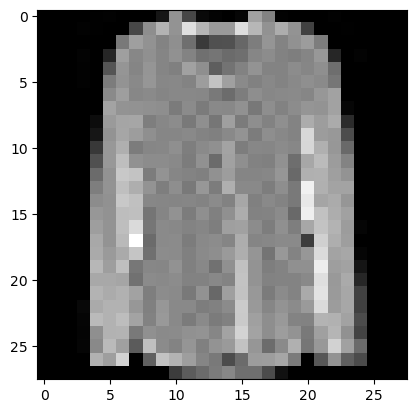

In [46]:
# single image test, select any image from test data
plt.imshow(x_test[3900], cmap = plt.get_cmap('gray'))
r1 = CNN_fashion_model.predict(x_test[7000:7001])
r1

In [47]:
r3 = np.argmax(r1, axis = 1)  # get the location of maximum probability and location
print(r3)
print(class_names[r3[0]])

[8]
Bag


In [25]:
NF = 32
CNN_fashion_model = Sequential()
CNN_fashion_model.add(Convolution2D(32, kernel_size = f_size, 
                                    input_shape = i_size, activation=AFH))
CNN_fashion_model.add(MaxPooling2D(pool_size = p_size))  # maxpool layer

CNN_fashion_model.add(Convolution2D(16, kernel_size = f_size, activation=AFH))
CNN_fashion_model.add(MaxPooling2D(pool_size = p_size))  # maxpool layer

CNN_fashion_model.add(Flatten())
CNN_fashion_model.add(Dense(units=NHN, activation=AFH))
CNN_fashion_model.add(Dense(units=NOP, activation=AFO))
CNN_fashion_model.compile(optimizer=OP, loss = BLOSS, metrics=[MET])


In [26]:
CNN_fashion_model.fit(xm_train, ym_train, batch_size=b_size, epochs=no_epochs)

Epoch 1/10
200/200 [==============================] - 28s 130ms/step - loss: 0.7662 - accuracy: 0.7327
Epoch 2/10
200/200 [==============================] - 25s 126ms/step - loss: 0.4642 - accuracy: 0.8338
Epoch 3/10
200/200 [==============================] - 25s 124ms/step - loss: 0.4114 - accuracy: 0.8519
Epoch 4/10
200/200 [==============================] - 26s 128ms/step - loss: 0.3815 - accuracy: 0.8631
Epoch 5/10
200/200 [==============================] - 28s 142ms/step - loss: 0.3554 - accuracy: 0.8713
Epoch 6/10
200/200 [==============================] - 27s 137ms/step - loss: 0.3375 - accuracy: 0.8773
Epoch 7/10
200/200 [==============================] - 26s 128ms/step - loss: 0.3225 - accuracy: 0.8822
Epoch 8/10
200/200 [==============================] - 25s 127ms/step - loss: 0.3080 - accuracy: 0.8882
Epoch 9/10
200/200 [==============================] - 26s 129ms/step - loss: 0.2949 - accuracy: 0.8935
Epoch 10/10
200/200 [==============================] - 26s 129ms/step - l

## to save and load model weights

In [41]:
path = 'C:/Users/Huligesh/Desktop/Internship'
CNN_fashion_model.save_weights(path + '21. CNN Fashion mnist dataset')

In [48]:
# to load
CNN_fashion_model.load_weights(path + '21. CNN Fashion mnist dataset')